# Bi-variate Discrete Distributions

Open in Google Colab: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/febse/stat2025/blob/main/08-Bi-variate-Discrete-Distributions.ipynb)

Until now we have been dealing with univariate distributions, i.e., distributions of a single random variable. In this notebook, we will discuss bi-variate distributions, i.e., distributions of two random variables. We will start with the simplest case, the joint distribution of two discrete random variables.

## Joint Distribution

Until now we have discussed the probability mass function (pmf) of a single discrete random variable. It answers questions such as "What is the probability that the random variable takes the value $x$?". It is very common that we are interested in more than out random variable. For example, we might conduct an experiment where we assign different marketing strategies to groups of customers and measure the number of products they buy. In that case we might be interested in the joint outcome of the marketing strategy and the number of products bought.

For discrete distributions with a limited number of outcomes, we can represent the joint distribution as a table. For example, consider the following table of two random variables $X$ and $Y$. $X$ can take the values 0, 1, 2, and 3, and $Y$ can take the values 2, and 3. The cells of the table contain the probability that the random variables take the corresponding values.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
# Import a couple of csv files from github


# Select specific columns
pxy = pd.DataFrame(itertools.product([0, 1, 2], [0, 1]), columns=["x", "y"])
pxy["p"] = [0.25, 0.15, 0.15, 0.05, 0.1, 0.3]


pxy_table = pd.pivot_table(pxy, values='p', index='x', columns='y').add_prefix('y=')
pxy_table

y,y=0,y=1
x,,
0,0.25,0.15
1,0.15,0.05
2,0.10,0.30


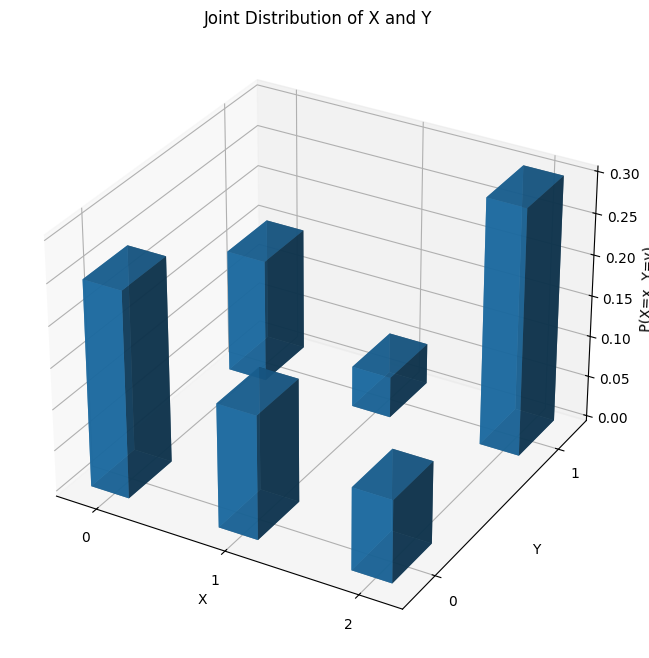

In [29]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot of the joint PMF
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Get x and y values from the table
x_vals_plot = pxy['x'].values
y_vals_plot = pxy['y'].values
p_vals = pxy['p'].values

# Set bar width
bar_width = 0.3

# Center bars on grid intersections by shifting by -bar_width/2
x_centers = x_vals_plot - bar_width / 2
y_centers = y_vals_plot - bar_width / 2

# Create bar plot
ax.bar3d(x_centers, y_centers, np.zeros_like(p_vals), 
         bar_width, bar_width, p_vals, shade=True, alpha=0.8)

# Set axes to only show possible values of x and y
ax.set_xticks(sorted(pxy['x'].unique()))
ax.set_yticks(sorted(pxy['y'].unique()))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('P(X=x, Y=y)')
ax.set_title('Joint Distribution of X and Y')

plt.show()

So we can look up probabilities such as

$$
P(X=0, Y=1) = 0.15
$$

directly from the table. We will write the PMF of two random variables $X$ and $Y$ as 

$$
f_{XY}(x, y) = P_{XY}(X=x, Y=y)
$$.

As the PMF of a single random variable, the joint PMF must satisfy the following properties:

1. $f_{XY}(x, y) \geq 0$ for all $x$ and $y$.
2. $\sum_x \sum_y f_{XY}(x, y) = 1$.


In [2]:
# Verify that the sum of all probabilities is 1

pxy_table.sum().sum()

np.float64(1.0)

# Marginal Distributions

If we have a joint distribution of two random variables, we can calculate the marginal distribution of each of the random variables, which are simply the univariate distributions of each of the random variables. For example, the marginal distribution of $X$ is

$$
f_X(x) = P(X = x) =  \sum_y f_{XY}(x, y)
$$

and the marginal distribution of $Y$ is

$$
f_Y(y) = P(Y = y) = \sum_x f_{XY}(x, y)
$$


In [3]:
# The marginal distribution of y is the sum of the rows of the table

pxy_table.sum(axis=0)

y
0    0.5
1    0.5
dtype: float64

In [4]:
# The marginal distribution of x is the sum of the columns of the table
pxy_table.sum(axis=1)

x
0    0.4
1    0.2
2    0.4
dtype: float64

## Problems (Marginal Distributions)

You own shares of Nvidia (X) and of AMD (Y). Your model for the joint distributions of the possible winnings and losses per share over the next trading day is uniform over the integer pairs with:

$$
-2 \leq x \leq 4, \quad -1 \leq  y - x \leq 1
$$

1. What are the expected winnings per share for X and Y?
2. What are the expected winnings value of a portfolio with 50 Nvidia and 100 AMD shares?


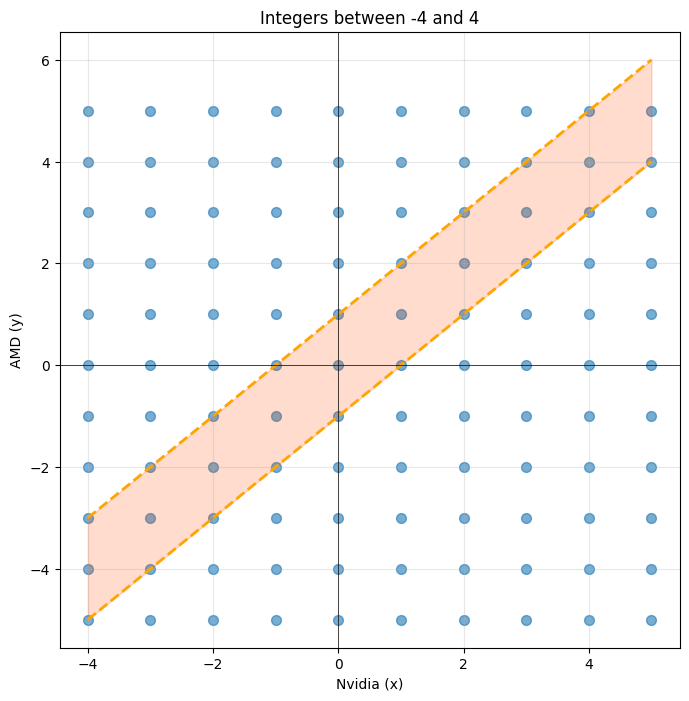

In [30]:
# Create a grid of integers between -4 and 4 in two dimensions
x_grid = np.arange(-4, 6)
y_grid = np.arange(-5, 6)

# Create a meshgrid
X, Y = np.meshgrid(x_grid, y_grid)

# Plot the grid
plt.figure(figsize=(8, 8))
plt.scatter(X, Y, s=50, alpha=0.6)
plt.grid(True, alpha=0.3)
plt.xlabel('Nvidia (x)')
plt.ylabel('AMD (y)')

x_vals = np.linspace(x_grid.min(), x_grid.max(), 100)
y_vals_high = 1 + x_vals
y_vals_low = -1 + x_vals

plt.plot(x_vals, y_vals_high, color='orange', linestyle='--', linewidth=2, label='y = 1 + x')
plt.plot(x_vals, y_vals_low, color='orange', linestyle='--', linewidth=2, label='y = -1 + x')
plt.fill_between(x_vals, y_vals_low, y_vals_high, color='orange', alpha=0.1)

plt.title('Integers between -4 and 4')
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)

# Plot the restriction y <= 1 + x
y_restrict = 1 + x_vals
plt.fill_between(x_vals, y_vals_low, y_vals_high, color='red', alpha=0.1)

plt.show()

## Conditional Distributions

A lot of questions in applied research boil down to the comparisons of conditional probabilities. For example, we might be interested in the probability that a customer buys a product given that they have been exposed to a certain marketing strategy or that a patient survives a decease given that they have been treated with a certain drug.

To be able to answer these questions, we need to calculate the conditional distribution of one random variable given the other. The conditional distribution of $X$ given $Y$ is defined as

$$
f_{X|Y}(x|y) = P(X=x|Y=y) = \frac{P(X=x, Y=y)}{P(Y=y)} = \frac{f_{XY}(x, y)}{f_Y(y)}
$$

and of course the conditional distribution of $Y$ given $X$ is

$$
f_{Y|X}(y|x) = P(Y=y|X=x) = \frac{P(X=x, Y=y)}{P(X=x)} = \frac{f_{XY}(x, y)}{f_X(x)}
$$


In [6]:
# Conditional distribution of x given y

x_marginal = pxy_table.sum(axis=0)
print(x_marginal)

px_given_y = pxy_table.div(x_marginal, axis=1)
px_given_y.round(3)

y
0    0.5
1    0.5
dtype: float64


y,0,1
x,,
0,0.5,0.3
1,0.3,0.1
2,0.2,0.6


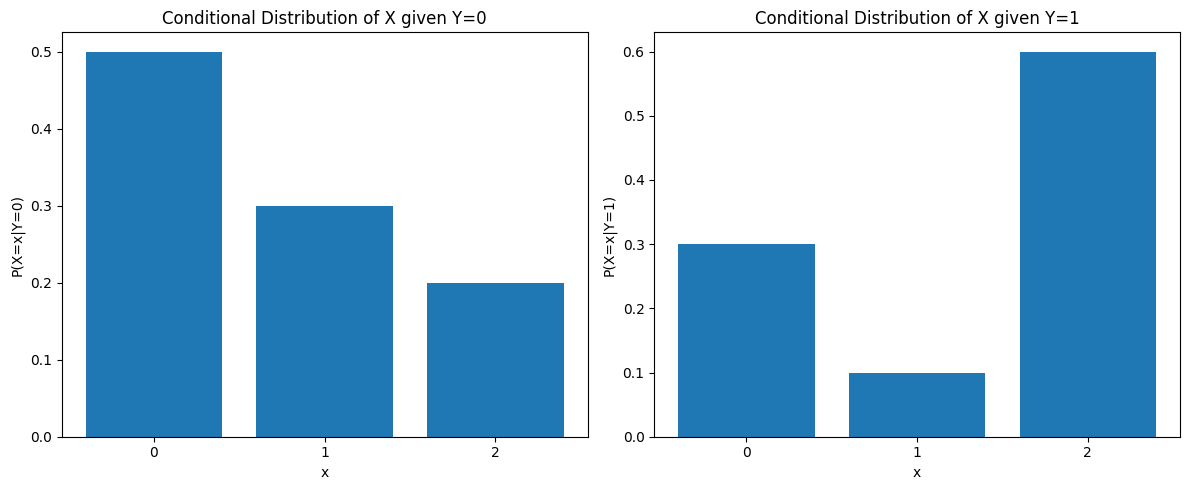

In [7]:
# Plot the conditional distributions of x given y
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot conditional distribution of x given y=0
axes[0].bar(px_given_y.index, px_given_y[0])
axes[0].set_xlabel('x')
axes[0].set_ylabel('P(X=x|Y=0)')
axes[0].set_title('Conditional Distribution of X given Y=0')
axes[0].set_xticks(px_given_y.index)

# Plot conditional distribution of x given y=1
axes[1].bar(px_given_y.index, px_given_y[1])
axes[1].set_xlabel('x')
axes[1].set_ylabel('P(X=x|Y=1)')
axes[1].set_title('Conditional Distribution of X given Y=1')
axes[1].set_xticks(px_given_y.index)

plt.tight_layout()
plt.show()

In [8]:
# Conditional distribution of y given x

y_marginal = pxy_table.sum(axis=1)
print(y_marginal)

py_given_x = pxy_table.div(y_marginal, axis=0)
py_given_x.round(3)

x
0    0.4
1    0.2
2    0.4
dtype: float64


y,0,1
x,,
0,0.625,0.375
1,0.750,0.250
2,0.250,0.750


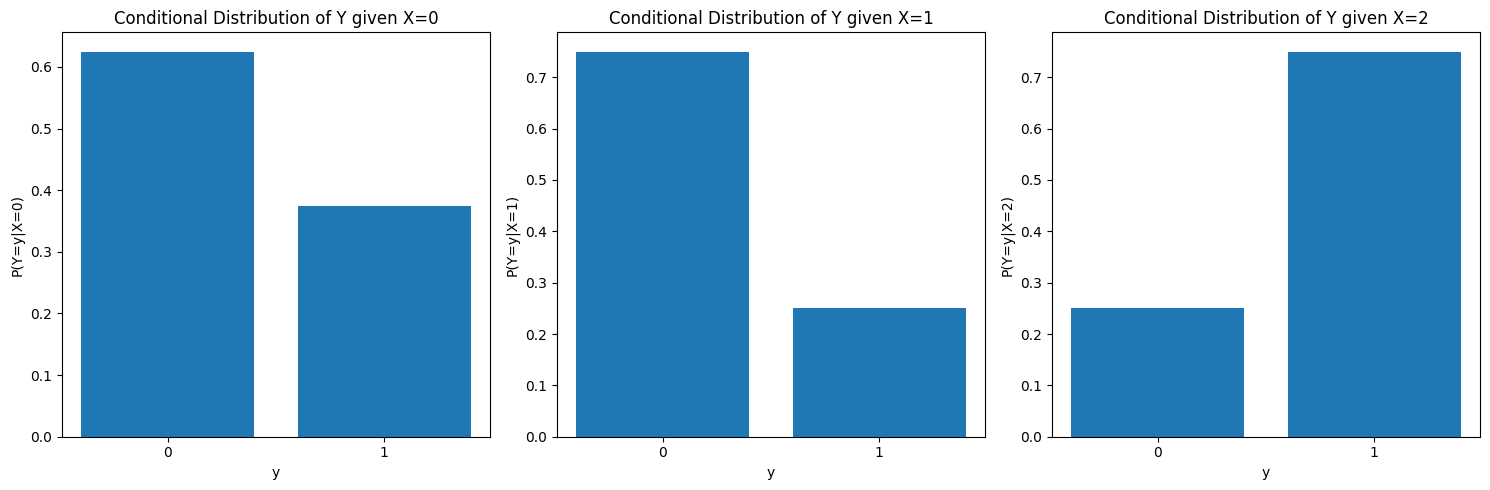

In [9]:
# Plot the conditional distributions of y given x
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot conditional distribution of y given x=0
axes[0].bar(py_given_x.columns, py_given_x.loc[0])
axes[0].set_xlabel('y')
axes[0].set_ylabel('P(Y=y|X=0)')
axes[0].set_title('Conditional Distribution of Y given X=0')
axes[0].set_xticks(py_given_x.columns)

# Plot conditional distribution of y given x=1
axes[1].bar(py_given_x.columns, py_given_x.loc[1])
axes[1].set_xlabel('y')
axes[1].set_ylabel('P(Y=y|X=1)')
axes[1].set_title('Conditional Distribution of Y given X=1')
axes[1].set_xticks(py_given_x.columns)

# Plot conditional distribution of y given x=2
axes[2].bar(py_given_x.columns, py_given_x.loc[2])
axes[2].set_xlabel('y')
axes[2].set_ylabel('P(Y=y|X=2)')
axes[2].set_title('Conditional Distribution of Y given X=2')
axes[2].set_xticks(py_given_x.columns)

plt.tight_layout()
plt.show()

## Conditional Moments

The conditional distributions are probability distributions in their own right, and we can summarize them in the same way as we summarize univariate distributions. For example, we can calculate the conditional mean of $X$ given $Y$ as

$$
E(X|Y=y) = \sum_x x f_{X|Y}(x|y)
$$

and the conditional variance of $X$ given $Y$ as

$$
Var(X|Y=y) = \sum_x (x - E(X|Y=y))^2 f_{X|Y}(x|y)
$$


:::{.callout-important }
## The Conditional Expectation is a Random Variable

Unlike the unconditional expectation, which is just a real number (not random), the conditional expectation depends on the value of the conditioning variable. Therefore, the conditional expectation is a random variable itself. This is important to keep in mind when we use the conditional expectation in further calculations.

:::

:::{.callout-important}
## The Expectation of the Joint Distribution is a Vector

The expectation of the joint distribution is a vector of the expectations of the individual random variables. For example, the expectation of the joint distribution of $X$ and $Y$ is

$$
E(X, Y) = \begin{pmatrix} E(X) \\ E(Y) \end{pmatrix}
$$

:::

In [10]:
# In pandas it is easier to calculate the conditional moments in a long format (more rows than columns)

pxy_long = pxy.melt(id_vars=['x', 'y'], var_name='var').rename(columns={'value': 'p'})
pxy_long

,x,y,var,p
0,0,0,p,0.25
1,0,1,p,0.15
2,1,0,p,0.15
3,1,1,p,0.05
4,2,0,p,0.10
5,2,1,p,0.30


In [11]:
# Conditional expectation of y given x

pxy_long.groupby('x').apply(lambda d: (d['y'] * d['p'] / d['p'].sum()).sum()).round(3)

/tmp/ipykernel_64322/1301969913.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pxy_long.groupby('x').apply(lambda d: (d['y'] * d['p'] / d['p'].sum()).sum()).round(3)


x
0    0.375
1    0.250
2    0.750
dtype: float64

In [12]:
# Conditional expectation of x given y

pxy_long.groupby('y').apply(lambda d: (d['x'] * d['p'] / d['p'].sum()).sum())


/tmp/ipykernel_64322/2853574574.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pxy_long.groupby('y').apply(lambda d: (d['x'] * d['p'] / d['p'].sum()).sum())


y
0    0.7
1    1.3
dtype: float64

## Predictions and Conditional Expectations

Consider a situation where you need to predict the outcome of a random variable, for example $X$. Although you know its distribution,
you don't know the actual outcome. Imagine that you pay a penalty (in money) where the penalty for wrong predictions is proportional to the squared difference between the predicted and actual value. Let's denote your prediction as $\hat{X}$. The penalty you pay is then given by:

$$
\text{Penalty} = (x - \hat{x})^2
$$

What will be the average penalty over many predictions? Can you find a prediction that makes your average penalty as small as possible?


In [16]:
x_marginal_dist = pxy_long.groupby('x')['p'].sum().to_frame()
x_marginal_dist

,p
x,
0,0.4
1,0.2
2,0.4


In [19]:

x_predicted = 0.2
x_outcome = np.random.choice(x_marginal_dist.index, p=x_marginal_dist["p"], size=1)

print(f"Prediction {x_predicted}, actual: {x_outcome}, error {x_outcome - x_predicted}, you pay {(x_outcome - x_predicted)**2}")

Prediction 0.2, actual: [1], error [0.8], you pay [0.64]


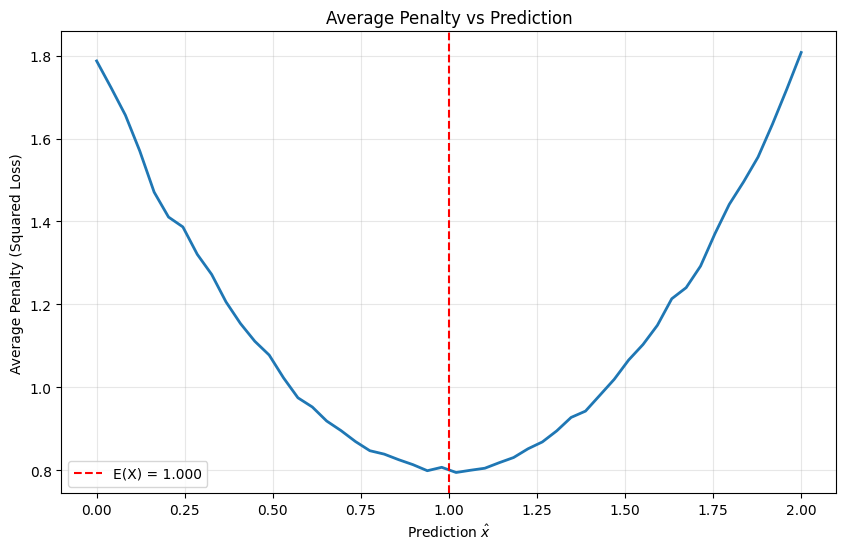

In [21]:
# Simulate predictions with different values of x_hat
n_simulations = 10000
x_hat_values = np.linspace(x_marginal_dist.index.min(), x_marginal_dist.index.max(), 50)
avg_penalties = []

for x_hat in x_hat_values:
    # Draw samples from the marginal distribution of X
    samples = np.random.choice(x_marginal_dist.index, size=n_simulations, p=x_marginal_dist["p"])
    
    # Calculate squared loss for each sample
    penalties = (samples - x_hat) ** 2
    
    # Calculate average penalty
    avg_penalty = np.mean(penalties)
    avg_penalties.append(avg_penalty)

# Calculate E(X) correctly
expected_x = np.sum(x_marginal_dist.index * x_marginal_dist["p"])

# Plot the average penalty as a function of the prediction
plt.figure(figsize=(10, 6))
plt.plot(x_hat_values, avg_penalties, linewidth=2)
plt.axvline(x=expected_x, color='red', 
            linestyle='--', label=f'E(X) = {expected_x:.3f}')
plt.xlabel(r'Prediction $\hat{x}$')
plt.ylabel(r'Average Penalty (Squared Loss)')
plt.title(r'Average Penalty vs Prediction')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

If we don't known anything more about $X$, the best we can do is to predict its expectation. However, if we do have information about another random variable $Y$ and the joint distribution of $X$ and $Y$, we can do better by using the conditional expectation of $X$ given $Y$ as our prediction:

If we know that $Y=1$, we can use the conditional expectation of $X$ given $Y=1$ as our prediction for $X$.

### Problems (Conditional Distributions)

The law of total expectation (derives from the definition of conditional expectation and the total probability theorem):

$$
E_{X}(X) = E_{Y}(E_{X|Y}(X|Y))
$$

says that you can obtain the unconditional expectation of a random variable $X$ by first calculating the conditional expectation of $X$ given $Y$ and then averaging their sum over the distribution of $Y$.

For an event $A$ with $P(A) > 0$ the law of total expectation states:

$$
E_{X}(X) = E_{A}(E_{X|A}(X|A))
$$

which is a succinct way of writing

$$
E(X) = E(X|A)P(A) + E(X|A^c)P(A^c)
$$

- Find the the expected number of trials until the first success in a sequence of Bernoulli trials with success probability $p$ using the law of total expectation.
- Also find the variance of the geometric distribution with success probability $p$.

$$ 
P(X = k) = (1-p)^{k-1} p, \quad k = 1, 2, \ldots
$$


## Independent Random Variables

Two random variables $X$ and $Y$ are independent if the result of one random variable does not affect the probability distribution of the other random variable. Formally, $X$ and $Y$ are independent if for all $x$ and $y$:

$$
P(X=x, Y=y) = P(X=x) P(Y=y)
$$

This implies that the joint PMF can be written as the product of the marginal PMFs:

$$
f_{XY}(x, y) = f_X(x) f_Y(y)
$$

### Problems (Independent Random Variables)

Construct the joint PMF under independence for the 

In [ ]:
# Construct the joint PMF under independence
# Under independence: P(X=x, Y=y) = P(X=x) * P(Y=y)

# Get marginal distributions
x_marginal = pxy_table.sum(axis=0)  # marginal of X
y_marginal = pxy_table.sum(axis=1)  # marginal of Y

# Construct joint PMF under independence using outer product
pxy_independent = pd.DataFrame(
    np.outer(y_marginal, x_marginal),
    index=pxy_table.index,
    columns=pxy_table.columns
)

print("Original joint PMF:")
print(pxy_table)
print("\nJoint PMF under independence:")
print(pxy_independent)
print("\nDifference (Original - Independent):")
print(pxy_table - pxy_independent)

## Convolution

For our two random variables $X$ and $Y$, we can define a new random variable $Z = X + Y$. The distribution of $Z$ is called the convolution of the distributions of $X$ and $Y$. The PMF of $Z$ can be calculated from the joint PMF of $X$ and $Y$.

What is convolution? For two functions $f$ and $g$, the convolution $f * g$ is defined as

$$
(f * g)(n) = \sum_{m=-\infty}^{\infty} f(m) g(n - m)
$$


## Covariance and Correlation

When we have two random variables, we are often interested in the relationship between them. For example, we may want to know how our product sales are related to marketing spending or how a person's annual income is related to their education level (as measured by years spent in education, for example). 

Here we will discuss a basic statistic that captures a **linear** relationship between two random variables, the covariance.

It is easier to understand the covariance if we start with its empirical counterpart, the sample covariance. The sample covariance between two random variables $X$ and $Y$ is defined as the average of the product of the deviations of the observations from their respective means. Let's say we have $n$ observations on pairs of values of $X$ and $Y$, $(x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n)$. The sample covariance is then

$$
S_{xy} = \frac{1}{n - 1} \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})
$$

where $\bar{x}$ and $\bar{y}$ are the sample means of $x$ and $y$, respectively. Again, the sample mean is the average of the observations.

$$
\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i
$$

$$
\bar{y} = \frac{1}{n} \sum_{i=1}^n y_i
$$

:::{#exr-sample-covariance}
## Sample Covariance

Let's calculate the sample covariance for the following data:

$$
\begin{align*}
x & : (x_1 = 0, x_2 = 1, x_3 = -1) \\
y & : (y_1 = 2, y_2 = 5, y_3 = 0)
\end{align*}
$$
:::
:::{.callout-note collapse="true"}
## Solution (click to expand)

The sample means are


:::


In [ ]:
# Let's do this with numpy

x = np.array([0, 1, -1])
y = np.array([2, 5, 0])

x_mean = np.mean(x)
y_mean = np.mean(y)

print("Sample mean of x:", x_mean)
print("Sample mean of y:", y_mean)


Sample mean of x: 0.0
Sample mean of y: 2.3333333333333335


In [ ]:
# Now, compute the deviations of x from their mean

x_dev = x - x_mean
print(x_dev)

y_dev = y - y_mean
print(y_dev)


[ 0.  1. -1.]
[-0.33333333  2.66666667 -2.33333333]


In [ ]:
# Now we have all the ingredients to compute the covariance

products = x_dev * y_dev
print(products)

cov_xy = np.sum(products) / (len(x) - 1)

print("Covariance of x and y:", cov_xy)

[-0.          2.66666667  2.33333333]
Covariance of x and y: 2.5


Now that you are familiar with the basic mechanics of the sample variance, let's move on to understand what it captures. For this purpose, we will generate some random data and calculate the covariance.


Sample mean of x: -0.20390646475338017
Sample mean of y: -0.3069991429610377
Covariance matrix of x and y:
 [[1.24407114 2.24874099]
 [2.24874099 4.9771663 ]]


Text(0.5, 1.0, 'Scatter plot of x and y')

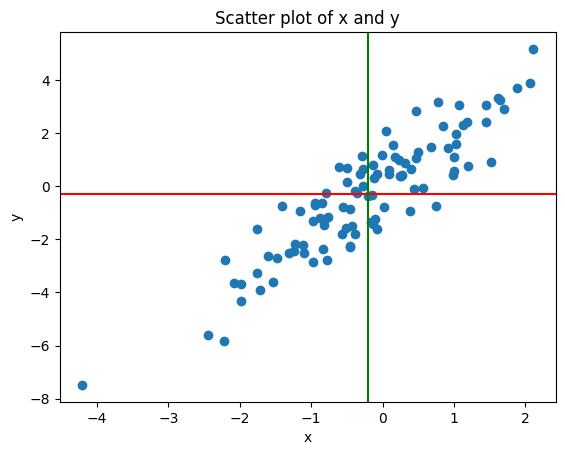

In [ ]:
# Generate some data (positive linear relationship)

x1 = np.random.randn(100)
y1 = 2 * x1 + np.random.randn(100)

print("Sample mean of x:", np.mean(x1))
print("Sample mean of y:", np.mean(y1))
print("Covariance matrix of x and y:\n", np.cov(x1, y1))

# Plot 

plt.scatter(x1, y1)
plt.axhline(y = np.mean(y1), color='red')
plt.axvline(x = np.mean(x1), color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')



Sample mean of x: 0.013216874485822656
Sample mean of y: 0.016093140263017114
Covariance matrix of x and y:
 [[ 1.01262532 -2.09556722]
 [-2.09556722  5.22953926]]


Text(0.5, 1.0, 'Scatter plot of x and y')

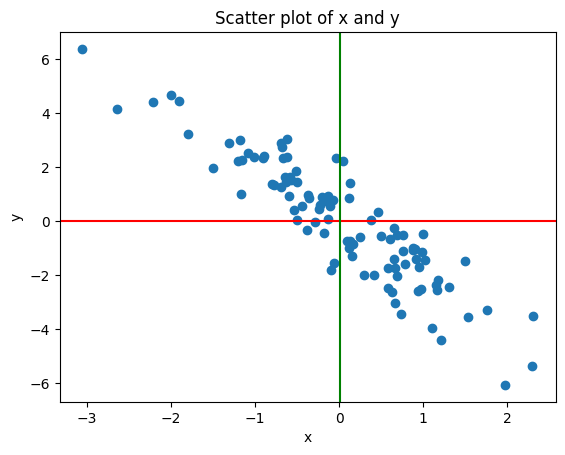

In [ ]:
# Generate some data (negative linear relationship)

x2 = np.random.randn(100)
y2 = - 2 * x2 + np.random.randn(100)

print("Sample mean of x:", np.mean(x2))
print("Sample mean of y:", np.mean(y2))
print("Covariance matrix of x and y:\n", np.cov(x2, y2))

# Plot

plt.scatter(x2, y2)
plt.axhline(y = np.mean(y2), color='red')
plt.axvline(x = np.mean(x2), color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')

Sample mean of x: -0.0006845902767402373
Sample mean of y: 0.018249098812860583
Covariance matrix of x and y:
 [[1.01992945 0.10195162]
 [0.10195162 1.46757588]]


Text(0.5, 1.0, 'Scatter plot of x and y')

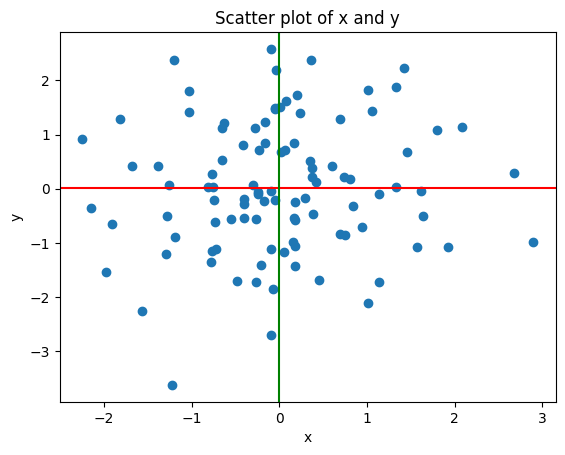

In [ ]:
# Generate some data (no linear relationship)

x3 = np.random.randn(100)
y3 = np.random.randn(100)

print("Sample mean of x:", np.mean(x3))
print("Sample mean of y:", np.mean(y3))
print("Covariance matrix of x and y:\n", np.cov(x3, y3))

# Plot

plt.scatter(x3, y3)
plt.axhline(y = np.mean(y3), color='red')
plt.axvline(x = np.mean(x3), color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')

## Non-Linear Relationships

It is important to remember that the covariance only captures linear relationships between two random variables. If the relationship is non-linear, the covariance will still describe the linear relationship between the two variables. However, it may be close to zero even if there is a strong non-linear relationship between the two variables.

Sample mean of x: -0.11318485717765613
Sample mean of y: -0.027788148775476387
Covariance matrix of x and y:
 [[7.70360324 0.10463424]
 [0.10463424 0.48480764]]


Text(0.5, 1.0, 'Scatter plot of x and y')

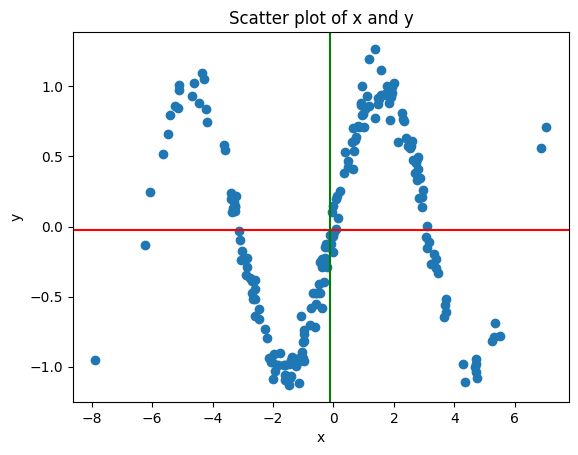

In [ ]:
# Generate some data (quadratic relationship)

x4 = np.random.randn(200) * 3
y4 = np.sin(x4) + np.random.randn(200) * 0.1

print("Sample mean of x:", np.mean(x4))
print("Sample mean of y:", np.mean(y4))

print("Covariance matrix of x and y:\n", np.cov(x4, y4))

# Plot

plt.scatter(x4, y4)
plt.axhline(y = np.mean(y4), color='red')
plt.axvline(x = np.mean(x4), color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x and y')

## Correlation

The **sign** of the covariance tells us about the direction of the relationship between two random variables. If the covariance is positive, the two variables tend to move in the same direction. If the covariance is negative, the two variables tend to move in opposite directions. However, we cannot say anything about how strong the relationship is.

The reason is that the covariance depends on the scale of the variables. For example, let's say we have two sets of measurements: height in m and monthly salary in 1000 USD.



In [ ]:
height_m = np.array([1.66, 1.76, 1.80, 1.90, 2.00])
income_1000USD = np.array([2.1, 3.5, 4.1, 4.3, 3.7])

np.cov(height_m, income_1000USD)

array([[0.01708, 0.0778 ],
       [0.0778 , 0.748  ]])

In [ ]:
# Now let's change the units of height to centimeters

height_cm = height_m * 100

np.cov(height_cm, income_1000USD)


array([[170.8  ,   7.78 ],
       [  7.78 ,   0.748]])

Notice that the covariance has changed and is now exactly 100 times larger than before. As an exercise, change the unit of measurement of the income to USD and see how the covariance changes.


## Of Variability and Variance

Until now we have discussed the span of the data and the inter-quartile range as measures of variability. Another measure of variability is the variance.

:::{#def-variance}
## The Sample Variance and Sample Standard Deviation

The variance of a collection of $n$ values $x_1, x_2, \ldots, x_n$ is calculated as the average (with a correction factor) of the squared differences between each value and the mean:

$$
\text{S}^2_{x} = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

This is a short way of writing:

$$
\text{S}^2_{x} = \frac{(x_1 - \bar{x})^2 + (x_2 - \bar{x})^2 + \ldots + (x_n - \bar{x})^2}{n - 1}
$$

The standard deviation is the square root of the variance:

$$
\text{S}_{x} = \sqrt{\text{S}^2_{x}}
$$

:::

What are the units of measurement of the variance and the standard deviation?

- Assume that x is measured in meters. What are the units of measurement of the variance and the standard deviation?
- Assume that x is measured in centimeters. What are the units of measurement of the variance and the standard deviation?
- Assume that x is measured in years. What are the units of measurement of the variance and the standard deviation?v


:::{#exm-variance}
## Computing the sample variance and the sample standard deviation

Given a set of measurements $x = (x_1 = 1, x_2 = 8, x_3 = 3)$, calculate the sample variance and the sample standard deviation.

:::
:::{.solution}

For the set $x$:

$$
\bar{x} = \frac{1 + 8 + 3}{3} = 4
$$

$$
\text{S}^2_{x} = \frac{(1 - 4)^2 + (8 - 4)^2 + (3 - 4)^2}{3 - 1} = \frac{9 + 16 + 1}{2} = 13
$$

:::


## The Covariance of Two Random Variables

Until now we have discussed the sample covariance, which is a measure of the linear relationship between two sets of observations. The covariance of two random variables is a generalization of the sample covariance to random variables. The covariance of two random variables $X$ and $Y$ is defined as

$$
\text{Cov}(X, Y) = E((X - E(X))(Y - E(Y)))
$$

where $E(X)$ and $E(Y)$ are the expectations of $X$ and $Y$, respectively. The covariance has the following properties:

1. $\text{Cov}(X, Y) = \text{Cov}(Y, X)$
2. $\text{Cov}(X, X) = \text{Var}(X)$
3. $\text{Cov}(aX, bY) = ab \text{Cov}(X, Y)$
4. $\text{Cov}(X + Y, Z) = \text{Cov}(X, Z) + \text{Cov}(Y, Z)$

## The Correlation between Two Random Variables

The correlation between two random variables $X$ and $Y$ is defined as

$$
\rho(X, Y) = \frac{\text{Cov}(X, Y)}{\sqrt{\text{Var}(X) \text{Var}(Y)}}
$$

The correlation is a standardized measure of the linear relationship between two random variables. It has the following properties:

1. $-1 \leq \rho(X, Y) \leq 1$
2. $\rho(X, Y) = 1$ if $Y = aX + b$ for some $a > 0$
3. $\rho(X, Y) = -1$ if $Y = aX + b$ for some $a < 0$
4. $\rho(X, Y) = 0$ if $X$ and $Y$ are independent. Note that the converse is generally not true (see the example with the empirical covariance above).

To see why these properties hold, consider the following scenarios:

$$
Y = 2X + 3
$$

$$
\begin{align*}
\text{Cov}(X, Y) & = \text{Cov}(X, 2X + 3) \\
                 & = E(X - E(X))(2X + 3 - E(2X + 3)) \\
                 & = E(X - E(X))(2X + 3 - 2E(X) - 3) \\
                 & = E(X - E(X))(2X - 2E(X)) \\
                 & = 2E(X - E(X))^2 \\
                 & = 2\text{Var}(X)
\end{align*}
$$

Substituting this into the formula for the correlation, we get

$$
\rho(X, Y) = \frac{2\text{Var}(X)}{\sqrt{\text{Var}(X) \text{Var}(2X + 3)}} = 1
$$

